<a href="https://colab.research.google.com/github/Sowmyapalakurthi/major-project/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv("water quality exel sheet.csv")

Water Quality prediction using boosting techniques

In [ ]:
df = pd.read_csv("water quality exel sheet.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,temparature
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,45
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,36
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,48
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,45
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,31


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'temparature'],
      dtype='object')

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,temparature
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110,39.975275
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849,6.031495
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,30.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000,35.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000,40.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000,45.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
 10  temparature      3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


<Axes: >

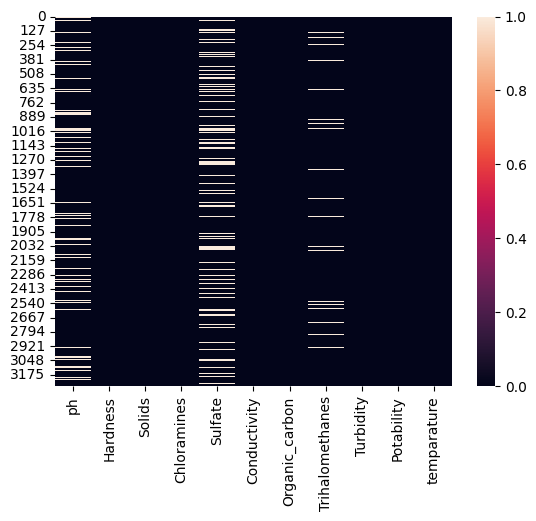

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

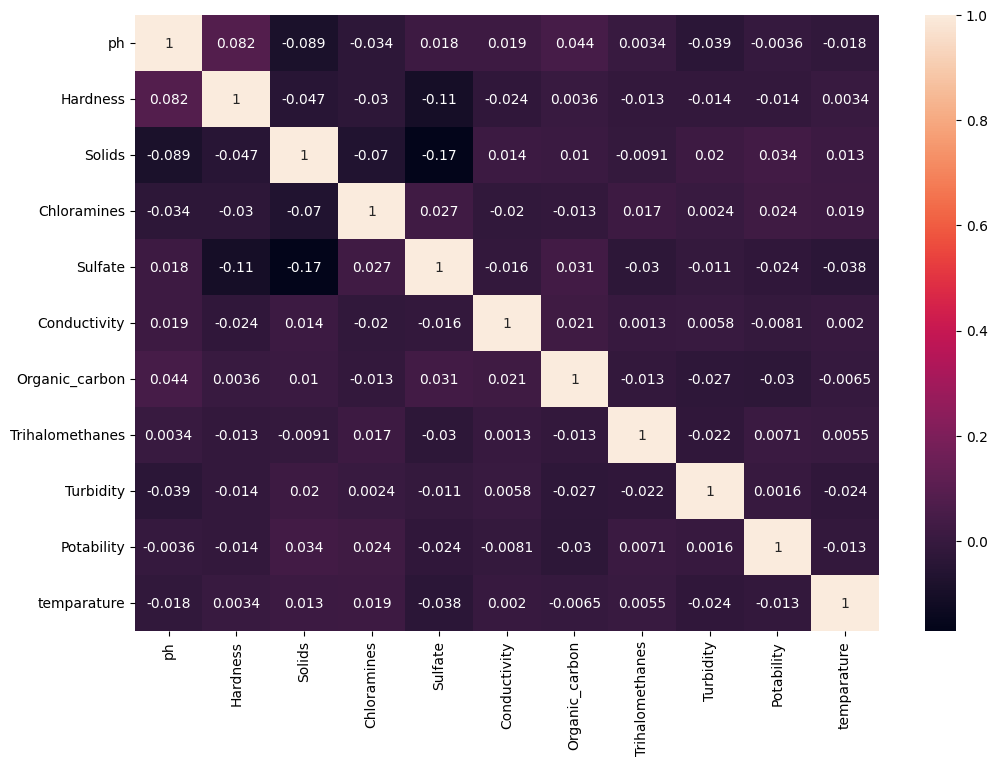

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

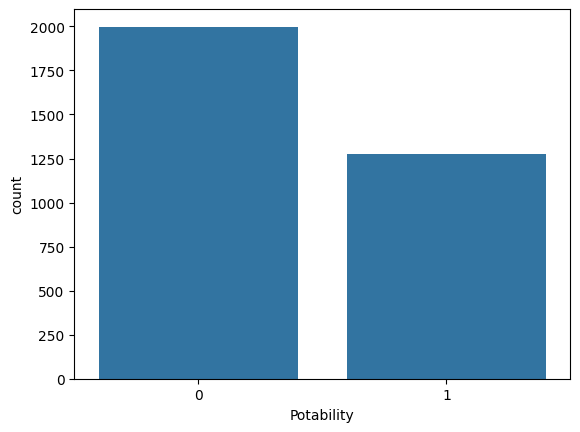

In [ ]:
sns.countplot(x="Potability",data=df)

here we are checking how many samples given are potable or not

In [ ]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


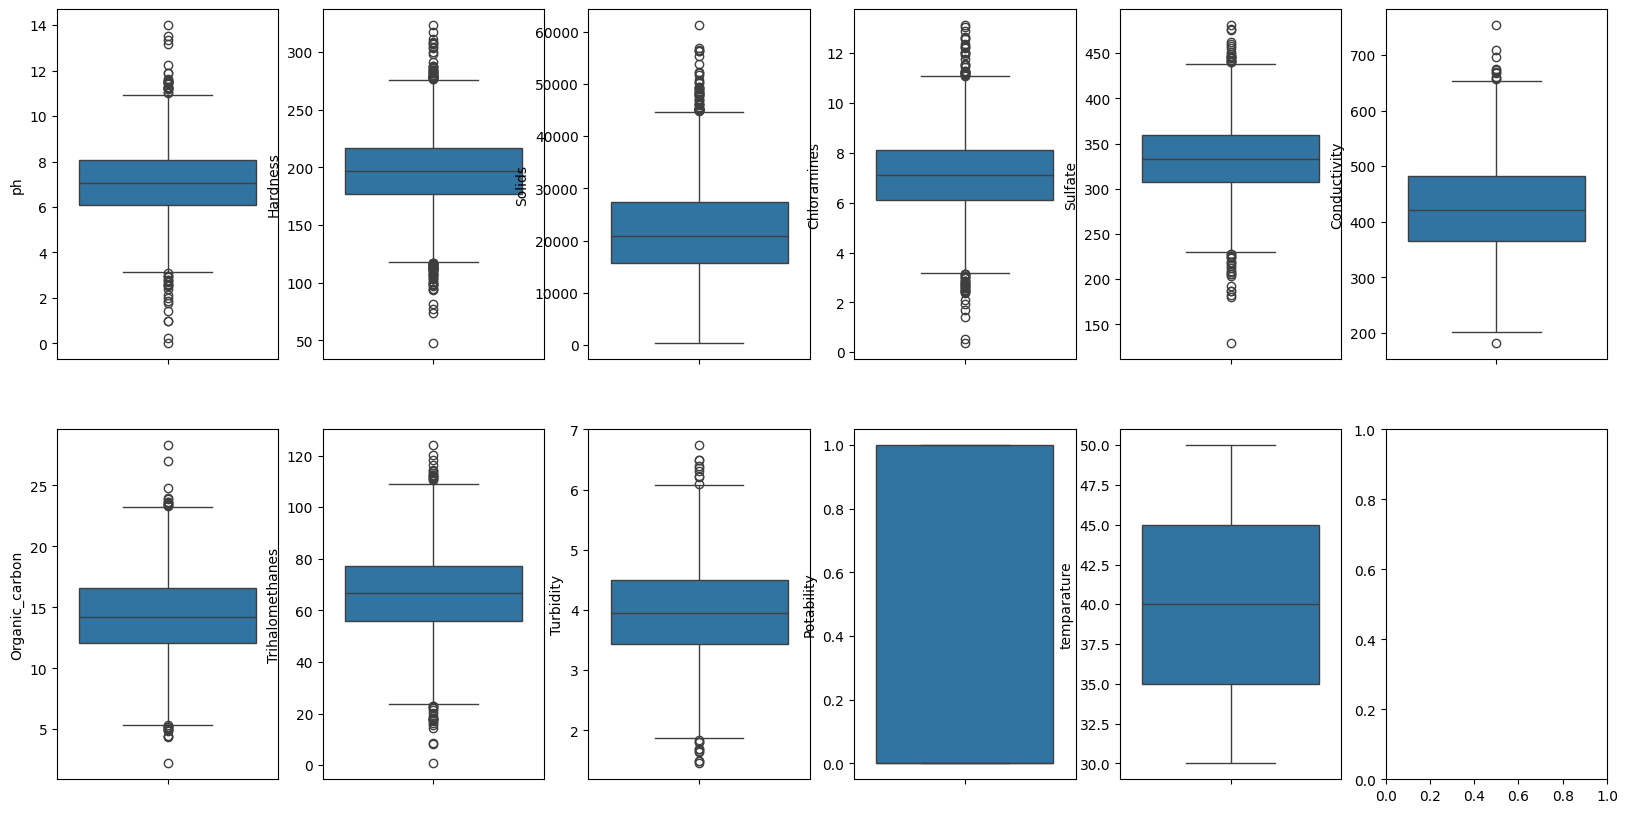

In [ ]:
#visualization dataset for checking outliers
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for col,vlues in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1


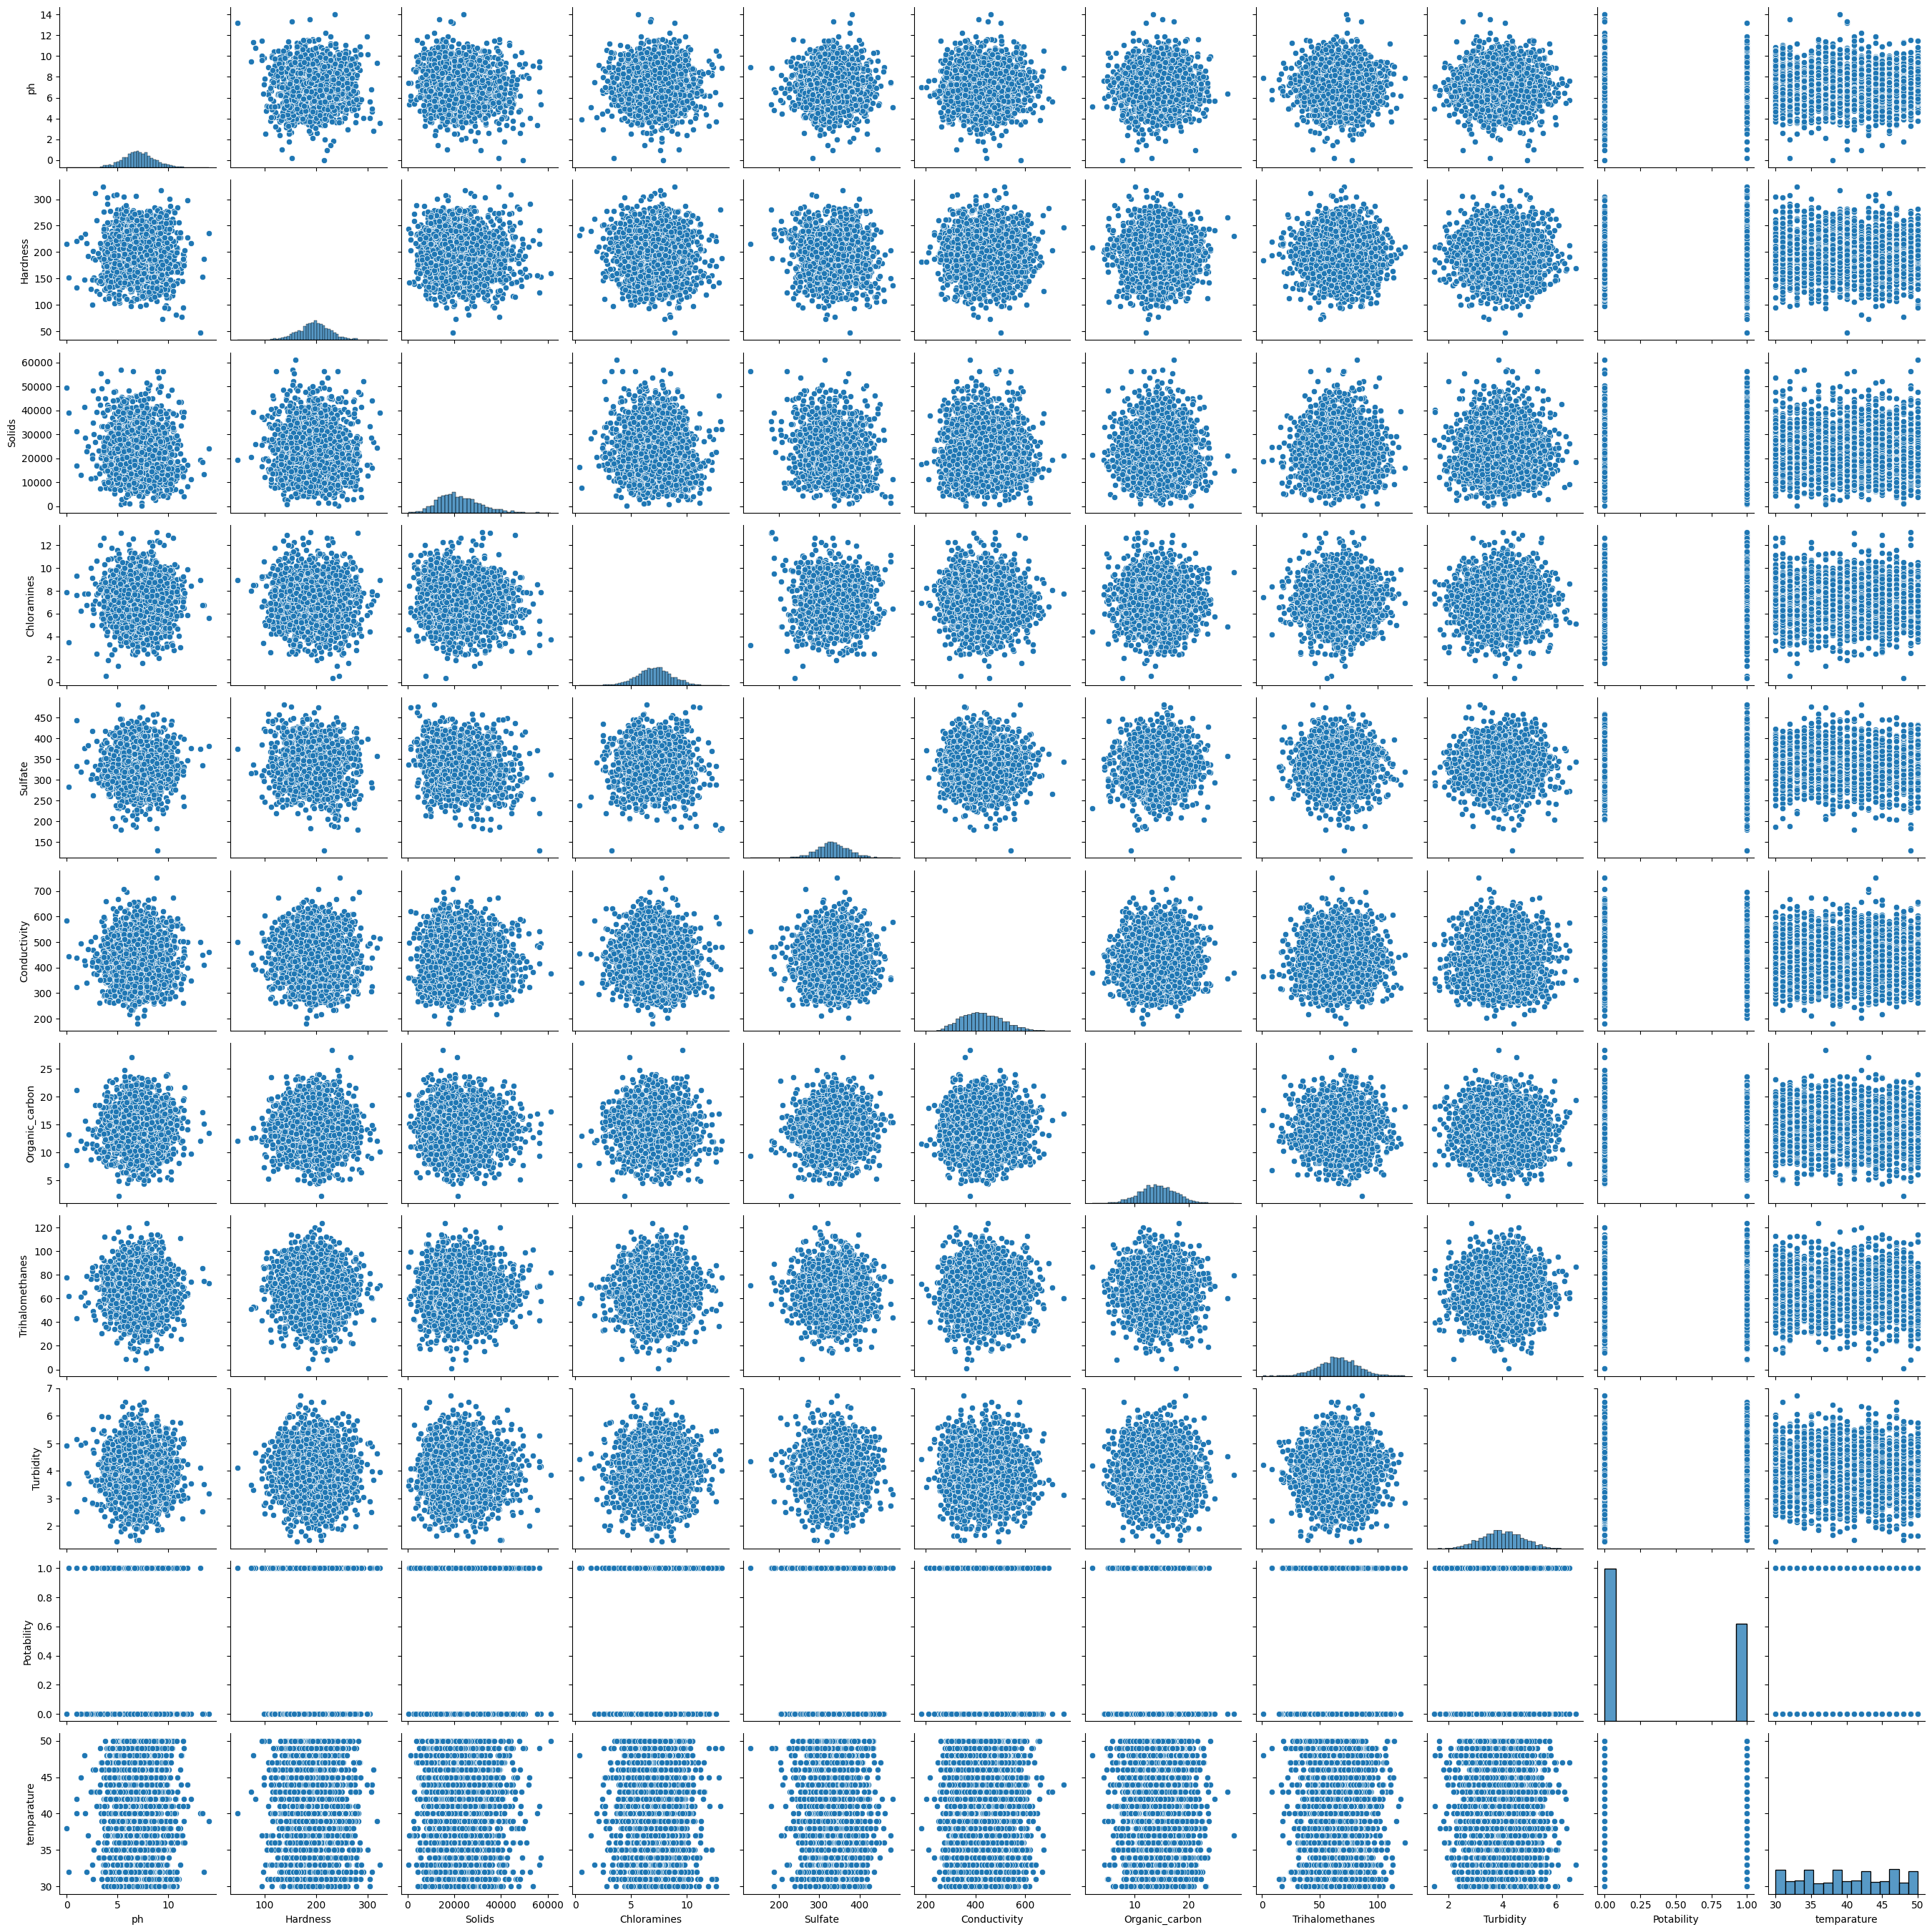

In [ ]:
sns.pairplot(df)

In [ ]:
fig=px.pie(df,names="Potability", hole=0.4)
fig.show()

In [ ]:
fig=px.scatter(df,x="ph",y="Sulfate",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentge of missing values')

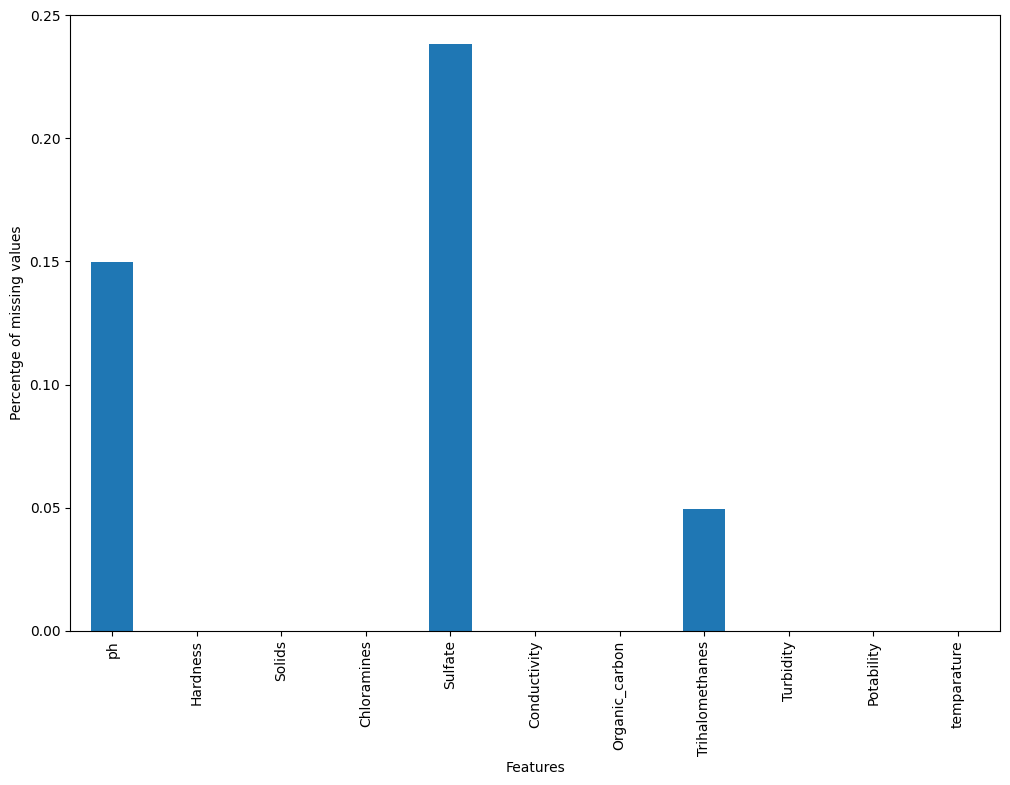

In [ ]:
df.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Percentge of missing values")

In [ ]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [ ]:
#in the previous step, we removed the null values by replacing null valuyes with mean of the data

Data preprocessing starts from here , we split the data here for tgis we should import sklearn , all the machine learning libraries consist in sklearn, the sklearn contains the linear regression and all


In [ ]:
x=df.drop("Potability",axis=1)
y=df["Potability"]

In [ ]:
x.shape,y.shape

((3276, 10), (3276,))

In [ ]:
#Decision tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating object of the model




In [ ]:
#training of decision tree
#.fit model is basically used for training of the machine learning model


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_dt = DecisionTreeClassifier(max_depth=4)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# mking prediction using decision tree
pred_dt=model_dt.predict(x_test)

In [ ]:
# mking prediction using decision tree
 # Import accuracy_score

pred_dt=model_dt.predict(x_test)

accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt # Now you can use accuracy_score

0.6341463414634146

<Axes: >

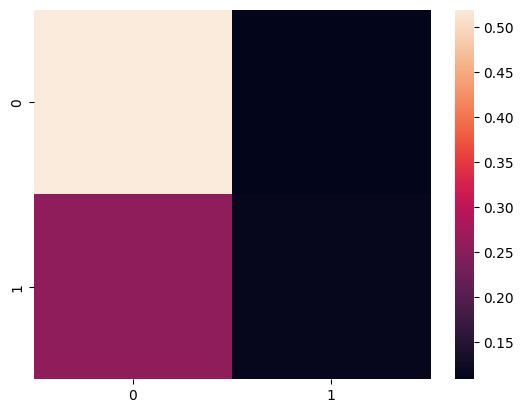

In [ ]:
#confusion matrix
cm2=confusion_matrix(y_test,pred_dt)
sns.heatmap(cm2/np.sum(cm2))

In [ ]:
cm2

array([[341,  71],
       [169,  75]])

ADABOOST CLASSIFIER


In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier

# Assuming x_train is a pandas DataFrame or a NumPy array
# Create an imputer object. We'll use the mean strategy here,
# but you can explore other strategies like 'median', 'most_frequent', or 'constant'.
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data to learn the imputation strategy
imputer.fit(x_train)

# Transform your training data to replace missing values
x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now, you can fit your AdaBoost model on the imputed data
model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)
model_ada.fit(x_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.03, n_estimators=100)

In [ ]:
pred_ada = model_ada.predict(x_test_imputed)

In [ ]:
#accuracy check
accuracy_score_da=accuracy_score(y_test,pred_ada)
accuracy_score_da

0.6371951219512195

XGBoostML

In [ ]:
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier # Import XGBClassifier from xgboost

# create model
model_xgb= XGBClassifier(n_estimators=100, learning_rate=0.04)

In [ ]:
model_xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction
pred_xgb=model_xgb.predict(x_test)

In [ ]:
#accuracy
accuracy_score_xgb=accuracy_score(y_test,pred_xgb)
accuracy_score_xgb

0.6798780487804879

Gradient booster algorithm


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'water quality exel sheet.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information to understand the structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
 10  temparature      3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


(         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
 0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
 2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
 3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  Potability  temparature  
 0       10.379783        86.990970   2.963135           0           45  
 1       15.180013        56.329076   4.500656           0           36  
 2       16.868637        66.420093   3.055934           0           48  
 3       18.436525       100.341674   4.628771           0           45  
 4       11.558279        31.997993   4.075075           0           31  ,
 None)

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer with the 'mean' strategy for numerical columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify if there are any remaining missing values
data_imputed.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_imputed.drop(columns=['Potability'])
y = data_imputed['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting sets to confirm the split
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((2620, 10), (656, 10), (2620,), (656,))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6753048780487805

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.91      0.78       412
         1.0       0.65      0.28      0.39       244

    accuracy                           0.68       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.67      0.68      0.63       656


Confusion Matrix:
 [[375  37]
 [176  68]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy after tuning:", accuracy)


Best Accuracy after tuning: 0.6829268292682927


In [ ]:
models=pd.DataFrame({
    "Model":["Decision Tree","AdaBoost","XGBoost","Gradient Boosting"],
    "Score":[accuracy_score_dt,accuracy_score_da,accuracy_score_xgb,accuracy]
})


In [ ]:
models

,Model,Score
0,Decision Tree,0.634146
1,AdaBoost,0.637195
2,XGBoost,0.679878
3,Gradient Boosting,0.682927


,Model,Score
3,Gradient Boosting,0.682927
2,XGBoost,0.679878
1,AdaBoost,0.637195
0,Decision Tree,0.634146


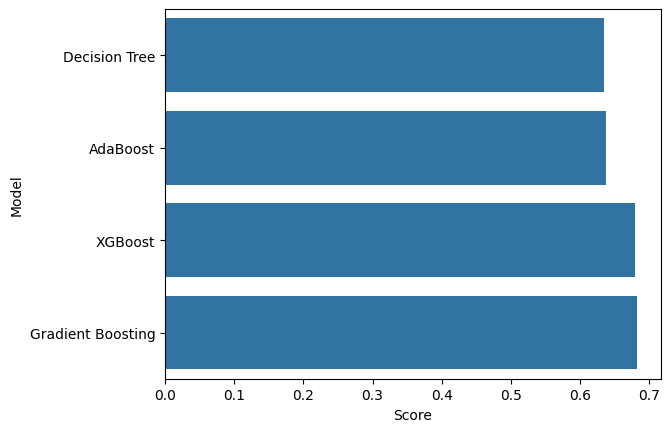

In [ ]:



sns.barplot(x="Score",y="Model",data=models) # Change 'Accuracy Score' to 'Score'
models.sort_values(by="Score",ascending= False) # Change 'Accuracy Score' to 'Score'